# ISM6562 Big Data for Business Applications- Final Project
## Solar Footprints Feasibility Analysis in California

### Business Context:

As the transition to renewable energy is growing, selecting optimal, cost-effective sites for solar installations is critical for developers, utility companies, and policymakers. The "Solar Footprints in California" dataset provides key insights into site feasibility by offering information on land classification, proximity to infrastructure, and available acreage. By utilizing **big data techniques** such as Apache Spark, we can process and analyze vast amounts of data quickly, uncovering patterns that drives data-driven decisions. This helps stakeholders make faster, more informed choices, avoiding costly, suboptimal locations. By combining Spark-based data processing with advanced predictive models and visualizations, we aim to improve the selection process for solar sites, aligning with California's renewable energy goals and broader environmental priorities.

### Main Objectives:

- _Classify solar sites based on feasibility using machine learning_: Build and apply machine learning models to classify solar installation sites as feasible or non-feasible based on technoeconomic criteria, using **Apache Spark's MLlib** for scalable model building and evaluation.
- _Optimize resource allocation with SparkSQL and visualizations_: Leverage **SparkSQL** for querying large datasets to understand site characteristics and identify high-value locations for investment, supported by advanced visualizations for decision-making.
- _Support strategic renewable energy planning with big data_: Enable policymakers and developers to make informed decisions about solar site locations, using **big data technologies** to scale up analysis and deliver results faster than traditional methods.
- _Minimize risks of non-feasible investments_: By using **Spark** for data cleaning, exploration, and predictive analysis, reduce financial, operational, and environmental risks associated with non-feasible solar sites.

### Overall Business Impact:

- _Improved Decision-Making_: By processing and analyzing large datasets with **Apache Spark**, developers, utility companies, and policymakers can make faster, data-driven decisions, reducing uncertainty and improving the accuracy of solar site feasibility evaluations.
- _Cost Savings_: Spark’s distributed computing enables the processing of large amounts of data efficiently, helping to avoid costly investments in non-feasible locations. **Data visualizations** further enhance understanding of site potential, ensuring effective resource allocation.
- _Accelerated Renewable Energy Expansion_: With the ability to process and analyze large datasets rapidly, we can speed up the identification and prioritization of solar sites, supporting California’s clean energy transition and contributing to national and global sustainability goals.
- _Enhanced Economic and Environmental Alignment_: Using **big data** techniques, we balance economic considerations (maximizing ROI) with environmental sustainability, helping stakeholders meet renewable energy targets while adhering to ecological and regulatory standards.

## Dataset Overview

The dataset provides essential information for **solar installation feasibility** analysis, incorporating both geographic characteristics and technical aspects such as proximity to nearby infrastructure (i.e. substations). These features influence the success, efficiency, and cost of solar power projects.

### Dataset Link: 
https://catalog.data.gov/dataset/solar-footprints-in-california-6251a

### Key Columns:

1. **_OBJECTID_**:  
   A unique identifier for each record in the dataset. This column is mainly for reference and does not contribute directly to the feasibility prediction.

2. **_County_**:  
   The name of the county where the solar installation site is located. This is important for geographic and policy-related analysis.

3. **_Acres_**:  
   The available land area (in acres) for solar installation. Larger areas generally allow for more solar panels and higher energy output, influencing feasibility.

4. **_Install Type_**:  
   The type of solar installation, such as rooftop, ground mount, or floating. The installation type affects the solar capacity, maintenance costs, and overall energy production efficiency.

5. **_Urban or Rural_**:  
   Indicates whether the site is in an urban or rural area. This can affect accessibility, land costs, and infrastructure considerations.

6. **_Combined Class_**:  
   A classification combining different factors related to the land and its suitability for solar installation. This helps in categorizing land based on its potential for solar power generation.

7. **_Distance to Substation (Miles) GTET 100 Max Voltage_**:  
   The distance (in miles) from the site to the GTET 100 substation, which influences the cost-effectiveness of connecting the site to the energy grid.

8. **_Percentile (GTET 100 Max Voltage)_**:  
   The percentile value representing the voltage efficiency at the GTET 100 substation. Higher values suggest better infrastructure for integrating solar power into the grid.

9. **_Substation Name GTET 100 Max Voltage_**:  
   The name of the GTET 100 substation, used for grid connectivity mapping and understanding its capacity to support solar energy.

10. **_HIFLD ID (GTET 100 Max Voltage)_**:  
   A unique identifier for the GTET 100 substation, used for mapping and reference purposes.

11. **_Distance to Substation (Miles) GTET 200 Max Voltage_**:  
   The distance (in miles) from the site to the GTET 200 substation. Proximity to substations is crucial for the cost and feasibility of connecting the site to the grid.

12. **_Percentile (GTET 200 Max Voltage)_**:  
   The percentile value representing voltage efficiency at the GTET 200 substation, indicating the quality of infrastructure available for solar integration.

13. **_Substation Name GTET 200 Max Voltage_**:  
   The name of the GTET 200 substation, used for identifying the proximity and capacity of nearby energy infrastructure.

14. **_HIFLD ID (GTET 200 Max Voltage)_**:  
   A unique identifier for the GTET 200 substation, used for mapping and reference purposes.

15. **_Distance to Substation (Miles) CAISO_**:  
   The distance (in miles) from the site to the CAISO substation. This helps evaluate the ease of connecting the site to the grid.

16. **_Percentile (CAISO)_**:  
   The percentile representing voltage efficiency at the CAISO substation, indicating its suitability for solar integration.

17. **_Substation CASIO Name_**:  
   The name of the CAISO substation. It is used to map the site’s proximity to the CAISO grid.

18. **_HIFLD ID (CAISO)_**:  
   A unique identifier for the CAISO substation, helping to map and evaluate grid connectivity.

19. **_Solar Technoeconomic Intersection_**:  
   A categorical variable that classifies the site’s feasibility for solar installation based on factors such as land area, proximity to substations, and environmental considerations.

20. **_Shape__Area_**:  
   The geometric area (in acres) of the land, which directly impacts the number of solar panels that can be installed.

21. **_Shape__Length_**:  
   The geometric length (in meters) of the land, which helps in determining the layout and arrangement of solar panels.

This dataset is crucial for determining **optimal solar installation sites**, based on factors like **land characteristics**, **distance to substations**, and other technical attributes. The features provided will help identify high-potential sites for solar expansion, enabling data-driven decision-making for stakeholders in the solar energy industry.


## 1. Data Loading and Spark Session Initialization

In [0]:
# Creating a Spark Session
from pyspark.sql import SparkSession
spark.conf.set("spark.sql.legacy.timeParserPolicy","LEGACY")
spark = SparkSession.builder.appName('Solar_Footprint').getOrCreate()

In [0]:
# Loading the Data
# File location and type
file_location = "/FileStore/tables/Solar_Footprints.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

OBJECTID County Acres Install Type Urban or Rural Combined Class Distance to Substation (Miles) GTET 100 Max Voltage Percentile (GTET 100 Max Voltage) Substation Name GTET 100 Max Voltage HIFLD ID (GTET 100 Max Voltage) Distance to Substation (Miles) GTET 200 Max Voltage Percentile (GTET 200 Max Voltage) Substation Name GTET 200 Max Voltage HIFLD ID (GTET 200 Max Voltage) Distance to Substation (Miles) CAISO Percentile (CAISO) Substation CASIO Name HIFLD ID (CAISO) Solar Technoeconomic Intersection Shape__Area Shape__Length 1 Alameda County 1.67263908679117 Rooftop Urban Rooftop - Urban 0.162731975570677 0 to 25th Dixon Landing 309200 2.27228273078495 0 to 25th Los Esteros 310258 2.27228273078495 0 to 25th Los Esteros 310258 Within 6768.95467948914 365.80133565156 2 Alameda County 1.89707764572969 Rooftop Urban Rooftop - Urban 0.226728300992343 0 to 25th Dixon Landing 309200 2.39281583656031 0 to 25th Los Esteros 310258 2.39281583656031 0 to 25th Los Esteros 310258 Within 7677.22898197174 366.909878174156 3 Alameda County 1.27578341416546 Rooftop Urban Rooftop - Urban 0.426103688504147 0 to 25th Dixon Landing 309200 2.53729833624532 0 to 25th Los Esteros 310258 2.53729833624532 0 to 25th Los Esteros 310258 Within 5162.93599033356 290.576263298961 4 Alameda County 1.42428582303303 Rooftop Urban Rooftop - Urban 0.491305910843725 0 to 25th Dixon Landing 309200 2.62669920611939 0 to 25th Los Esteros 310258 2.62669920611939 0 to 25th Los Esteros 310258 Within 5763.90575408936 344.705845911712 5 Alameda County 0.98442874236246 Rooftop Urban Rooftop - Urban 0.795821930914427 0 to 25th Dixon Landing 309200 2.72862942749739 0 to 25th Los Esteros 310258 2.72862942749739 25th to 50th Los Esteros 310258 Within 3983.85969257355 283.968425462226 6 Alameda County 2.27556123899746 Rooftop Urban Rooftop - Urban 1.06061317263354 0 to 25th Dixon Landing 309200 2.82629760263322 0 to 25th Los Esteros 310258 2.82629760263322 25th to 50th Los Esteros 310258 Within 9208.90591144562 422.343507033017 7 Alameda County 0.82432026671322 Rooftop Urban Rooftop - Urban 1.39735998222532 25th to 50th Dixon Landing 309200 3.08342316109515 0 to 25th Los Esteros 310258 3.08342316109515 25th to 50th Los Esteros 310258 Within 3335.92050170898 232.171526218198 8 Alameda County 1.63108479691837 Rooftop Urban Rooftop - Urban 1.3466050360129 0 to 25th Nummi 305808 3.16107060258884 25th to 50th Los Esteros 310258 3.16107060258884 25th to 50th Los Esteros 310258 Within 6600.78523349762 339.331693926596 9 Alameda County 1.91358088509715 Rooftop Urban Rooftop - Urban 1.14522051950388 0 to 25th Dixon Landing 309200 3.23768185424336 25th to 50th Los Esteros 310258 3.23768185424336 25th to 50th Los Esteros 310258 Within 7743.99422550201 393.800819027131 10 Alameda County 0.562090341601896 Parking Urban Parking - Urban 1.16907690231912 0 to 25th Dixon Landing 309200 3.28550490261479 25th to 50th Los Esteros 310258 3.28550490261479 25th to 50th Los Esteros 310258 Within 2274.70787239075 188.845197102678 11 Alameda County 7.31241579607883 Rooftop Urban Rooftop - Urban 1.21691878628464 0 to 25th Nummi 305808 3.2578491505676 25th to 50th Newark Distribution 309183 3.33690155116184 25th to 50th Los Esteros 310258 Within 29592.3753347397 806.434937980282 12 Alameda County 7.15489898006455 Rooftop Urban Rooftop - Urban 1.05498242054442 0 to 25th Nummi 305808 3.13476519589767 25th to 50th Newark Distribution 309183 3.464362956056 25th to 50th Los Esteros 310258 Within 28954.9354038239 764.285997721934 13 Alameda County 1.17921357941656 Rooftop Urban Rooftop - Urban 0.887263191021957 0 to 25th Nummi 305808 2.73840590211969 0 to 25th Newark Distribution 309183 3.63326721297534 25th to 50th Los Esteros 310258 Within 4772.13269138336 303.054145032473 14 Alameda County 2.08400774180839 Ground Urban Ground - Urban 0.767027920959119 0 to 25th Nummi 305808 2.30674596341091 0 to 25th Newark Distribution 309183 3.88323458811696 25th to 50th Los Esteros 310258 Within 8433.72251224518 406.8322044

In [0]:
# Create a view or table
temp_table_name = "Solar_Footprints_csv"
df.createOrReplaceTempView(temp_table_name)

## 2. SparkSQL Implementation

#### 2.1 Solar Installations Within vs Outside Substation Ranges

This query counts the number of solar installations based on whether they fall within or outside the technoeconomic feasibility criteria for solar installation, using the `Solar Technoeconomic Intersection` field. This field shows whether a site is deemed feasible based on factors such as land area, proximity to infrastructure, and environmental considerations.


In [0]:
spark.sql("""
    SELECT `Solar Technoeconomic Intersection`, COUNT(*) as count
    FROM Solar_Footprints_csv
    GROUP BY `Solar Technoeconomic Intersection`
""").show()

+---------------------------------+-----+
|Solar Technoeconomic Intersection|count|
+---------------------------------+-----+
|                          Outside| 1607|
|                           Within| 3790|
+---------------------------------+-----+



#### 2.2 Distribution by Installation Type

This query shows the count, percentage, and average land area in acres of each solar installation type.


In [0]:
spark.sql("""
    SELECT `Install Type`, COUNT(*) as count, 
          ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM Solar_Footprints_csv), 2) as percentage,
          AVG(Acres) as avg_acres
    FROM Solar_Footprints_csv 
    GROUP BY `Install Type` 
    ORDER BY count DESC;
""").show()

+------------+-----+----------+------------------+
|Install Type|count|percentage|         avg_acres|
+------------+-----+----------+------------------+
|      Ground| 2164|     40.10| 65.84808876140129|
|     Rooftop| 1841|     34.11|2.8449501927818677|
|     Parking| 1392|     25.79|1.8087852374826974|
+------------+-----+----------+------------------+



#### 2.3 Top 10 Counties by Solar Adoption

This query shows the top 10 counties with the highest total acres of solar installations, including the number of installations and average distance to the nearest substation.


In [0]:
county_stats = spark.sql("""
  SELECT 
    County,
    COUNT(*) AS installation_count,
    ROUND(SUM(Acres),2) AS total_acres,
    ROUND(AVG(`Distance to Substation (Miles) GTET 100 Max Voltage`),2) AS avg_distance
  FROM Solar_Footprints_csv
  GROUP BY County
  ORDER BY total_acres DESC
  LIMIT 10
""")

display(county_stats)

County installation_count total_acres avg_distance Kern County 523 31120.01 4.67 Riverside County 189 27407.23 4.09 Imperial County 48 16433.79 4.82 San Bernardino County 317 16015.42 3.94 Kings County 137 15900.62 7.82 Los Angeles County 681 11084.96 6.11 Fresno County 372 8462.82 3.39 San Luis Obispo County 71 4749.2 11.68 Tulare County 257 3302.9 13.9 Merced County 162 2436.53 5.09

#### 2.4 Urban vs Rural Distribution

This query shows the count and percentage of solar installations located in urban versus rural areas using the `Urban or Rural` field.


In [0]:
spark.sql("""
    SELECT `Urban or Rural`, COUNT(*) as count,
        ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM Solar_Footprints_csv), 2) as percentage
    FROM Solar_Footprints_csv 
    GROUP BY `Urban or Rural`;
""").show()

+--------------+-----+----------+
|Urban or Rural|count|percentage|
+--------------+-----+----------+
|         Urban| 3631|     67.28|
|         Rural| 1766|     32.72|
+--------------+-----+----------+



#### 2.5 Average Distance to Substation by County

This query calculates the average distance to substations (at different voltage levels: 100, 200 and CAISO) for each county based on solar installation locations.


In [0]:
spark.sql("""
    SELECT County, 
        ROUND(AVG(`Distance to Substation (Miles) GTET 100 Max Voltage`),2) as avg_distance_100,
        ROUND(AVG(`Distance to Substation (Miles) GTET 200 Max Voltage`),2) as avg_distance_200,
        ROUND(AVG(`Distance to Substation (Miles) CAISO`),2) as avg_distance_CAISO
    FROM Solar_Footprints_csv
    GROUP BY County
    ORDER BY avg_distance_100, avg_distance_200, avg_distance_CAISO
    LIMIT 10;
""").show()

+-------------------+----------------+----------------+------------------+
|             County|avg_distance_100|avg_distance_200|avg_distance_CAISO|
+-------------------+----------------+----------------+------------------+
|   San Mateo County|            1.11|            3.37|              7.28|
| Santa Clara County|            1.29|            5.22|               6.4|
|Contra Costa County|            1.49|            4.81|              5.88|
|        Mono County|            1.56|           20.41|             32.88|
|      Sonoma County|            1.65|             4.5|              3.12|
|    Tuolumne County|            1.69|            3.72|              1.69|
|      Solano County|            1.72|            3.03|              4.53|
|   Mendocino County|            1.85|           31.17|              7.77|
|        Yolo County|            1.88|           10.71|              5.38|
|     Alameda County|            1.95|            3.31|              9.89|
+-------------------+----

#### 2.6 Distribution by Combined Class

This query provides the count and average acres of solar installations grouped by their combined class.


In [0]:
spark.sql("""
    SELECT `Combined Class`, COUNT(*) as count, AVG(Acres) as avg_acres
    FROM Solar_Footprints_csv
    GROUP BY `Combined Class`
    ORDER BY count DESC;
""").show()

+---------------+-----+------------------+
| Combined Class|count|         avg_acres|
+---------------+-----+------------------+
|Rooftop - Urban| 1710|2.9019052056126733|
| Ground - Rural| 1570| 83.36612745812224|
|Parking - Urban| 1327|1.7805333114009343|
| Ground - Urban|  594| 19.54620197040467|
|Rooftop - Rural|  131|  2.10149162834918|
|Parking - Rural|   65| 2.385559174567322|
+---------------+-----+------------------+



#### 2.7 Correlation Between Acres and Distance to Substation

This query calculates the correlation between the area of solar installations (`Acres`) and the distance to substations at different voltage levels (GTET 100, GTET 200, and CAISO).


In [0]:
spark.sql("""
    SELECT 
    ROUND(CORR(Acres, `Distance to Substation (Miles) GTET 100 Max Voltage`),4) as corr_100,
    ROUND(CORR(Acres, `Distance to Substation (Miles) GTET 200 Max Voltage`),4) as corr_200,
    ROUND(CORR(Acres, `Distance to Substation (Miles) CAISO`),4) as corr_CAISO
    FROM Solar_Footprints_csv;
""").show()

+--------+--------+----------+
|corr_100|corr_200|corr_CAISO|
+--------+--------+----------+
|  0.0319|  0.0061|   -0.0186|
+--------+--------+----------+



#### 2.8 Distance Impact on Installation Size

This query analyzes the impact of the distance to substations on the average size of solar installations by grouping installations into distance bins (0-2 miles, 2-5 miles, and 5+ miles) and calculating the average size and count of installations for each bin.


In [0]:
distance_analysis = spark.sql("""
  SELECT 
    CASE 
      WHEN `Distance to Substation (Miles) GTET 100 Max Voltage` < 2 THEN '0-2 miles'
      WHEN `Distance to Substation (Miles) GTET 100 Max Voltage` < 5 THEN '2-5 miles'
      ELSE '5+ miles'
    END AS distance_bin,
    ROUND(AVG(Acres),2) AS avg_size,
    COUNT(*) AS installations
  FROM Solar_Footprints_csv
  GROUP BY 1
  ORDER BY distance_bin
""")

display(distance_analysis)

distance_bin avg_size installations 0-2 miles 19.89 2002 2-5 miles 28.81 1716 5+ miles 36.32 1679

Databricks visualization. Run in Databricks to view.

#### 2.9 Counties with High Solar Potential but Far from Substations

This query identifies counties with high solar adoption potential that are far from substations. It helps to highlight regions where solar installations are abundant but may face infrastructure challenges due to long distances from the nearest substation. This analysis focuses on counties where the average distance to the substation is above the average for all counties, indicating that these areas might require additional investments in grid infrastructure for integration.


In [0]:
infra_gaps = spark.sql("""
  WITH county_stats AS (
    SELECT 
      County,
      ROUND(AVG(`Distance to Substation (Miles) GTET 100 Max Voltage`),2) AS avg_distance,
      COUNT(*) AS installations
    FROM Solar_Footprints_csv
    GROUP BY County
  )
  SELECT * FROM county_stats
  WHERE avg_distance > (SELECT AVG(avg_distance) FROM county_stats)
  ORDER BY installations DESC
""")

display(infra_gaps)

County avg_distance installations Los Angeles County 6.11 681 Tulare County 13.9 257 Kings County 7.82 137 San Luis Obispo County 11.68 71 Ventura County 24.24 68 Monterey County 12.08 60 Santa Barbara County 6.41 38 Tehama County 15.17 17 Inyo County 17.02 15 Colusa County 14.42 10 Glenn County 8.44 10 Lassen County 26.4 4 Humboldt County 9.15 3 Amador County 6.28 2 Plumas County 15.03 1

Databricks visualization. Run in Databricks to view.

#### 2.10 Heatmap of Feasible Sites by County and Distance Range
This heatmap helps identify high-potential areas for solar installations by visualizing the distribution of feasible sites in relation to distance from substations. 

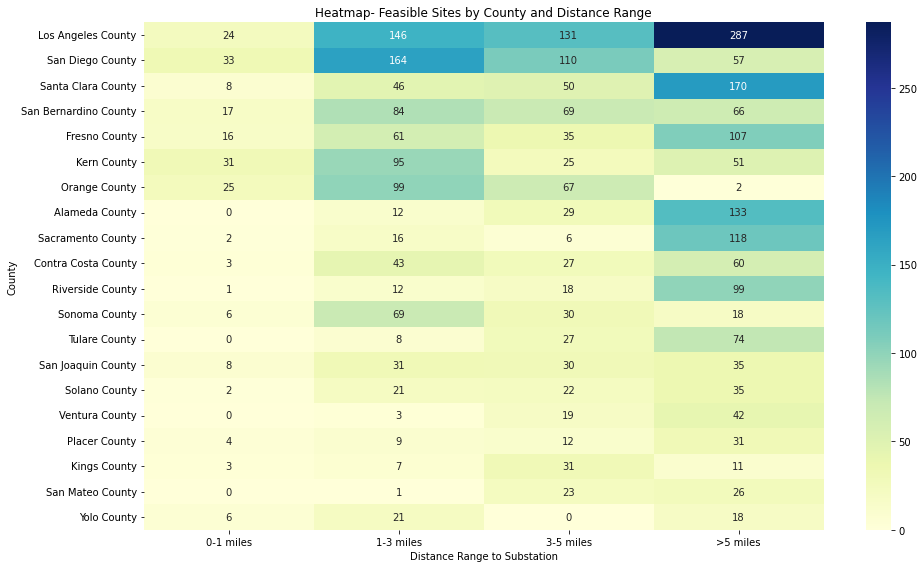

In [0]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Create the distance range column in the Solar_Footprints_csv DataFrame
df = spark.table("Solar_Footprints_csv").withColumn(
    "Distance Range",
    F.when(F.col("Distance to Substation (Miles) CAISO") <= 1, "0-1 miles")
    .when(F.col("Distance to Substation (Miles) CAISO") <= 3, "1-3 miles")
    .when(F.col("Distance to Substation (Miles) CAISO") <= 5, "3-5 miles")
    .otherwise(">5 miles")
)

# Filter the data for feasible sites ("Within")
df_feasible = df.filter(F.col("Solar Technoeconomic Intersection") == "Within")

# Group by county and distance range and count the occurrences
heatmap_data = df_feasible.groupBy("County", "Distance Range").count()
heatmap_data_pd = heatmap_data.toPandas()

# Create a pivot table
heatmap_data_pivot = heatmap_data_pd.pivot_table(index='County', columns='Distance Range', values='count', fill_value=0)

# select the top 20 counties
top_counties = heatmap_data_pivot.sum(axis=1).sort_values(ascending=False).head(20).index
heatmap_data_pivot = heatmap_data_pivot.loc[top_counties]

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap- Feasible Sites by County and Distance Range")
plt.ylabel("County")
plt.xlabel("Distance Range to Substation")
plt.tight_layout()
plt.show()


#### 2.11 Correlation Matrix

This correlation matrix heatmap visualizes the relationships between various features in the dataset.


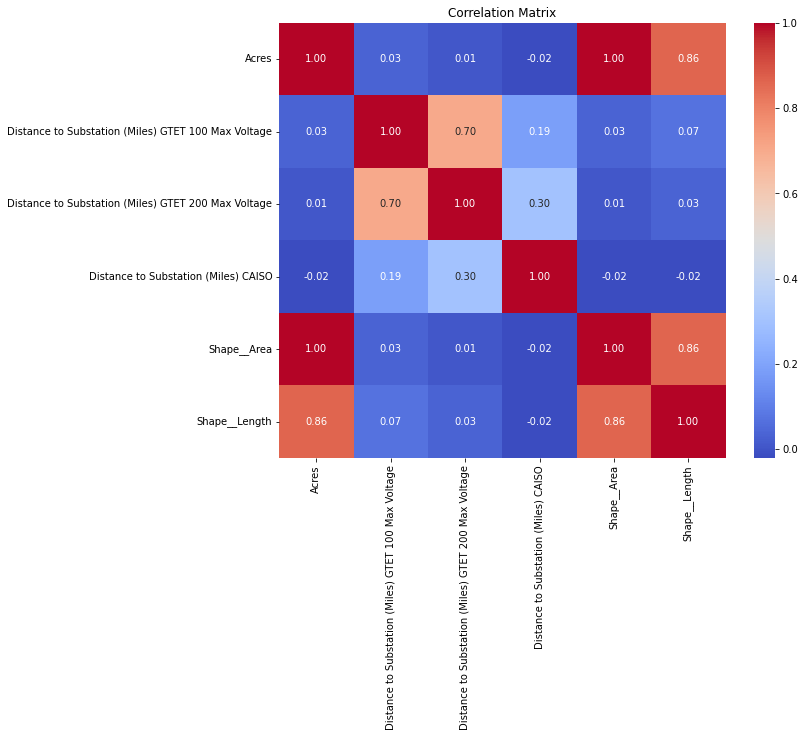

In [0]:
# Import libraries
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select columns
numeric_cols = ["Acres", "Distance to Substation (Miles) GTET 100 Max Voltage", 
                "Distance to Substation (Miles) GTET 200 Max Voltage", 
                "Distance to Substation (Miles) CAISO", "Shape__Area", "Shape__Length"]

# Prepare the data with vector assembler
assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
vector_df = assembler.transform(df)

# Compute the correlation matrix
correlation_matrix = Correlation.corr(vector_df, "features").head()[0]
corr_array = correlation_matrix.toArray()

# Convert correlation matrix to dataframe
corr_df = pd.DataFrame(corr_array, columns=numeric_cols, index=numeric_cols)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 3. Data Cleaning & Feature Engineering

Before building machine learning models, the dataset requires some _data cleaning_ and _feature engineering_ to ensure it is in the best possible shape for analysis. This section describes the steps taken to handle missing values, convert data types, and create new features that may help improve model performance.


In [0]:
df.printSchema()

root
 |-- OBJECTID: integer (nullable = true)
 |-- County: string (nullable = true)
 |-- Acres: double (nullable = true)
 |-- Install Type: string (nullable = true)
 |-- Urban or Rural: string (nullable = true)
 |-- Combined Class: string (nullable = true)
 |-- Distance to Substation (Miles) GTET 100 Max Voltage: double (nullable = true)
 |-- Percentile (GTET 100 Max Voltage): string (nullable = true)
 |-- Substation Name GTET 100 Max Voltage: string (nullable = true)
 |-- HIFLD ID (GTET 100 Max Voltage): integer (nullable = true)
 |-- Distance to Substation (Miles) GTET 200 Max Voltage: double (nullable = true)
 |-- Percentile (GTET 200 Max Voltage): string (nullable = true)
 |-- Substation Name GTET 200 Max Voltage: string (nullable = true)
 |-- HIFLD ID (GTET 200 Max Voltage): integer (nullable = true)
 |-- Distance to Substation (Miles) CAISO: double (nullable = true)
 |-- Percentile (CAISO): string (nullable = true)
 |-- Substation CASIO Name: string (nullable = true)
 |-- HIFLD I

In [0]:
# Count the number of rows in the dataset
row_count = df.count()
print(f"Total number of rows: {row_count}")

Total number of rows: 5397


In [0]:
from pyspark.sql.functions import col, when, count

# Check for missing values
missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
display(missing_values)

OBJECTID County Acres Install Type Urban or Rural Combined Class Distance to Substation (Miles) GTET 100 Max Voltage Percentile (GTET 100 Max Voltage) Substation Name GTET 100 Max Voltage HIFLD ID (GTET 100 Max Voltage) Distance to Substation (Miles) GTET 200 Max Voltage Percentile (GTET 200 Max Voltage) Substation Name GTET 200 Max Voltage HIFLD ID (GTET 200 Max Voltage) Distance to Substation (Miles) CAISO Percentile (CAISO) Substation CASIO Name HIFLD ID (CAISO) Solar Technoeconomic Intersection Shape__Area Shape__Length Distance Range 0 0 0 0 0 0 0 0 0 142 0 0 0 232 0 0 10 217 0 0 0 0

In [0]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Display the cleaned data
display(df_cleaned.limit(10))

OBJECTID County Acres Install Type Urban or Rural Combined Class Distance to Substation (Miles) GTET 100 Max Voltage Percentile (GTET 100 Max Voltage) Substation Name GTET 100 Max Voltage HIFLD ID (GTET 100 Max Voltage) Distance to Substation (Miles) GTET 200 Max Voltage Percentile (GTET 200 Max Voltage) Substation Name GTET 200 Max Voltage HIFLD ID (GTET 200 Max Voltage) Distance to Substation (Miles) CAISO Percentile (CAISO) Substation CASIO Name HIFLD ID (CAISO) Solar Technoeconomic Intersection Shape__Area Shape__Length Distance Range 1 Alameda County 1.67263908679117 Rooftop Urban Rooftop - Urban 0.162731975570677 0 to 25th Dixon Landing 309200 2.27228273078495 0 to 25th Los Esteros 310258 2.27228273078495 0 to 25th Los Esteros 310258 Within 6768.95467948914 365.80133565156 1-3 miles 2 Alameda County 1.89707764572969 Rooftop Urban Rooftop - Urban 0.226728300992343 0 to 25th Dixon Landing 309200 2.39281583656031 0 to 25th Los Esteros 310258 2.39281583656031 0 to 25th Los Esteros 310258 Within 7677.22898197174 366.909878174156 1-3 miles 3 Alameda County 1.27578341416546 Rooftop Urban Rooftop - Urban 0.426103688504147 0 to 25th Dixon Landing 309200 2.53729833624532 0 to 25th Los Esteros 310258 2.53729833624532 0 to 25th Los Esteros 310258 Within 5162.93599033356 290.576263298961 1-3 miles 4 Alameda County 1.42428582303303 Rooftop Urban Rooftop - Urban 0.491305910843725 0 to 25th Dixon Landing 309200 2.62669920611939 0 to 25th Los Esteros 310258 2.62669920611939 0 to 25th Los Esteros 310258 Within 5763.90575408936 344.705845911712 1-3 miles 5 Alameda County 0.98442874236246 Rooftop Urban Rooftop - Urban 0.795821930914427 0 to 25th Dixon Landing 309200 2.72862942749739 0 to 25th Los Esteros 310258 2.72862942749739 25th to 50th Los Esteros 310258 Within 3983.85969257355 283.968425462226 1-3 miles 6 Alameda County 2.27556123899746 Rooftop Urban Rooftop - Urban 1.06061317263354 0 to 25th Dixon Landing 309200 2.82629760263322 0 to 25th Los Esteros 310258 2.82629760263322 25th to 50th Los Esteros 310258 Within 9208.90591144562 422.343507033017 1-3 miles 7 Alameda County 0.82432026671322 Rooftop Urban Rooftop - Urban 1.39735998222532 25th to 50th Dixon Landing 309200 3.08342316109515 0 to 25th Los Esteros 310258 3.08342316109515 25th to 50th Los Esteros 310258 Within 3335.92050170898 232.171526218198 3-5 miles 8 Alameda County 1.63108479691837 Rooftop Urban Rooftop - Urban 1.3466050360129 0 to 25th Nummi 305808 3.16107060258884 25th to 50th Los Esteros 310258 3.16107060258884 25th to 50th Los Esteros 310258 Within 6600.78523349762 339.331693926596 3-5 miles 9 Alameda County 1.91358088509715 Rooftop Urban Rooftop - Urban 1.14522051950388 0 to 25th Dixon Landing 309200 3.23768185424336 25th to 50th Los Esteros 310258 3.23768185424336 25th to 50th Los Esteros 310258 Within 7743.99422550201 393.800819027131 3-5 miles 10 Alameda County 0.562090341601896 Parking Urban Parking - Urban 1.16907690231912 0 to 25th Dixon Landing 309200 3.28550490261479 25th to 50th Los Esteros 310258 3.28550490261479 25th to 50th Los Esteros 310258 Within 2274.70787239075 188.845197102678 3-5 miles

In [0]:
# Again check for missing values
missing_values = df_cleaned.select([count(when(col(c).isNull(), c)).alias(c) for c in df_cleaned.columns])
display(missing_values)

OBJECTID County Acres Install Type Urban or Rural Combined Class Distance to Substation (Miles) GTET 100 Max Voltage Percentile (GTET 100 Max Voltage) Substation Name GTET 100 Max Voltage HIFLD ID (GTET 100 Max Voltage) Distance to Substation (Miles) GTET 200 Max Voltage Percentile (GTET 200 Max Voltage) Substation Name GTET 200 Max Voltage HIFLD ID (GTET 200 Max Voltage) Distance to Substation (Miles) CAISO Percentile (CAISO) Substation CASIO Name HIFLD ID (CAISO) Solar Technoeconomic Intersection Shape__Area Shape__Length Distance Range 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

#### Dropping Irrelevant Columns

We removed columns that won't be helping in predicting solar installation feasibility, such as identifiers and substation-related data.

#### Dropped Columns:
- `OBJECTID`: It is a general identifier with no predictive value.
- `HIFLD ID`, `Substation Name`: Unique identifiers for substations, so it is not useful for model prediction.
- `Percentile (CAISO)`: Substation-specific data which is not related to feasibility.
- `Substation CAISO Name`: Redundant technical name, so it is not needed for prediction.

By removing these columns, we are focusing on the most important features for our model, improving its clarity and training efficiency.


In [0]:
# Drop irrelevant columns
df_cleaned = df_cleaned.drop("OBJECTID", "HIFLD ID (GTET 100 Max Voltage)", "HIFLD ID (GTET 200 Max Voltage)",
                             "Substation Name GTET 100 Max Voltage", "Substation Name GTET 200 Max Voltage",
                             "Percentile (CAISO)", "Substation CASIO Name")

# Display the cleaned dataset
display(df_cleaned.limit(10))

County Acres Install Type Urban or Rural Combined Class Distance to Substation (Miles) GTET 100 Max Voltage Percentile (GTET 100 Max Voltage) Distance to Substation (Miles) GTET 200 Max Voltage Percentile (GTET 200 Max Voltage) Distance to Substation (Miles) CAISO HIFLD ID (CAISO) Solar Technoeconomic Intersection Shape__Area Shape__Length Distance Range Alameda County 1.67263908679117 Rooftop Urban Rooftop - Urban 0.162731975570677 0 to 25th 2.27228273078495 0 to 25th 2.27228273078495 310258 Within 6768.95467948914 365.80133565156 1-3 miles Alameda County 1.89707764572969 Rooftop Urban Rooftop - Urban 0.226728300992343 0 to 25th 2.39281583656031 0 to 25th 2.39281583656031 310258 Within 7677.22898197174 366.909878174156 1-3 miles Alameda County 1.27578341416546 Rooftop Urban Rooftop - Urban 0.426103688504147 0 to 25th 2.53729833624532 0 to 25th 2.53729833624532 310258 Within 5162.93599033356 290.576263298961 1-3 miles Alameda County 1.42428582303303 Rooftop Urban Rooftop - Urban 0.491305910843725 0 to 25th 2.62669920611939 0 to 25th 2.62669920611939 310258 Within 5763.90575408936 344.705845911712 1-3 miles Alameda County 0.98442874236246 Rooftop Urban Rooftop - Urban 0.795821930914427 0 to 25th 2.72862942749739 0 to 25th 2.72862942749739 310258 Within 3983.85969257355 283.968425462226 1-3 miles Alameda County 2.27556123899746 Rooftop Urban Rooftop - Urban 1.06061317263354 0 to 25th 2.82629760263322 0 to 25th 2.82629760263322 310258 Within 9208.90591144562 422.343507033017 1-3 miles Alameda County 0.82432026671322 Rooftop Urban Rooftop - Urban 1.39735998222532 25th to 50th 3.08342316109515 0 to 25th 3.08342316109515 310258 Within 3335.92050170898 232.171526218198 3-5 miles Alameda County 1.63108479691837 Rooftop Urban Rooftop - Urban 1.3466050360129 0 to 25th 3.16107060258884 25th to 50th 3.16107060258884 310258 Within 6600.78523349762 339.331693926596 3-5 miles Alameda County 1.91358088509715 Rooftop Urban Rooftop - Urban 1.14522051950388 0 to 25th 3.23768185424336 25th to 50th 3.23768185424336 310258 Within 7743.99422550201 393.800819027131 3-5 miles Alameda County 0.562090341601896 Parking Urban Parking - Urban 1.16907690231912 0 to 25th 3.28550490261479 25th to 50th 3.28550490261479 310258 Within 2274.70787239075 188.845197102678 3-5 miles

#### Feature Engineering for Machine Learning

This step prepares the data for machine learning by:
1. Assembling numerical features into a single feature vector (`features`) using `VectorAssembler`.
2. Standardizing the feature vector (`scaled_features`) to bring all features to the same scale using `StandardScaler`.
3. Converting the categorical target column `Solar Technoeconomic Intersection` into numerical indices (`feasibility`) with `StringIndexer`, preparing the data for ML models.


In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer

# Assemble multiple numerical input columns into a single feature vector
feature_cols = [
    "Acres", 
    "Distance to Substation (Miles) GTET 100 Max Voltage", 
    "Distance to Substation (Miles) GTET 200 Max Voltage", 
    "Distance to Substation (Miles) CAISO", 
    "Shape__Area", 
    "Shape__Length"
]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Standardize the assembled features to bring them onto the same scale
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Convert the target categorical column into numerical indices for ML modeling
label_indexer = StringIndexer(inputCol="Solar Technoeconomic Intersection", outputCol="feasibility")

#### Splitting the Data into Training and Test Sets

To evaluate the model’s performance effectively, we will split the dataset into training and test sets using an 80/20 ratio:

- **80%** of the data is used for training the model.
- **20%** is for testing to assess the model's generalization.

This ensures that the model learns from a majority of the data while still being validated on unseen examples.


In [0]:
# Split the data into training and test sets
train_data, test_data = df_cleaned.randomSplit([0.8, 0.2])

print(f"Training data count: {train_data.count()}")
print(f"Test data count: {test_data.count()}")

Training data count: 3921
Test data count: 1005


## 4. Articulating False Positives and False Negatives

### False Positives (FPs): 

- A False Positive occurs when the model incorrectly predicts the site as feasible when it is actually non-feasible.

**Impact**:
- _Financial Loss_: Stakeholders might invest in a suboptimal site, leading to increased costs for installation and maintenance with poor energy yield.
- _Inefficiency_: Resources and efforts are wasted on developing sites that fail to meet the necessary economic or technical thresholds.
- _Environmental Risks_: Developing non-feasible sites may harm ecosystems or lead to regulatory issues if the site is not suited for solar infrastructure.

### False Negatives (FNs): 

- A False Negative occurs when the model incorrectly predicts the site as non-feasible when it is actually feasible.

**Impact**:
- _Missed Opportunities_: High-potential sites are overlooked, causing delays in renewable energy adoption.
- _Lower ROI_: Stakeholders fail to maximize their investments by ignoring cost-effective, high-yield sites.
- _Strategic Gaps_: Policymakers and developers may miss opportunities to align projects with California’s energy goals, slowing progress toward renewable energy targets.

In this scenario, the balance depends on the stakeholders specific priorities:
- If stakeholders have limited budgets and are highly risk-averse, minimizing False Positives is more critical.
- If the overarching objective is rapid renewable energy deployment and maximizing impact, minimizing False Negatives should take precedence.

However, a hybrid approach, emphasizing low FPs while managing FNs to avoid major missed opportunities, is likely the most practical strategy in this case.

## 5. ML Model Selection & Implementation

For this project, we selected the following models to predict solar installation feasibility:

- **Logistic Regression**: A simple linear model ideal for binary classification, serving as a baseline model.
- **Decision Tree**: A tree-based classifier that splits features to make decisions and easy to interpret.
- **Random Forest**: An ensemble method that aggregates multiple decision trees to capture complex data patterns.
- **XGBoost**: A high-performance boosting algorithm known for its accuracy and efficiency on structured datasets.

#### Pipeline and Hyperparameter Tuning

To ensure efficient model training and evaluation, we have used a pipeline that combines feature engineering, label indexing, and model training into a seamless workflow. This approach will help to ensure consistency, minimize the errors, and improves model efficiency.

We also have performed hyperparameter tuning using CrossValidator and a parameter grid to explore different configurations of hyperparameters. This allows us to optimize model performance by selecting the best values for parameters.

#### Evaluation Metrics

Each model is evaluated using the same pipeline and the following metrics:

- **Accuracy**: Proportion of correct predictions.
- **Precision**: Proportion of true positive predictions.
- **Recall**: Proportion of actual positives correctly identified.
- **F1 Score**: Harmonic mean of precision and recall.
- **AUC**: Measures the model's ability to distinguish between classes.

These metrics help determine the most accurate and reliable model for predicting solar installation feasibility.


### 5.1 Logistic Regression

In our case, this model helps to predict whether a site is feasible (1) or not feasible (0) for solar installation based on multiple input features.

Why Logistic Regression?
- Logistic Regression provides clear coefficients, making it easy to understand the impact of each feature on feasibility prediction. This is crucial when explaining predictions to stakeholders.
- Given its simplicity, Logistic Regression serves as a strong baseline model to compare against more complex models like Random Forest and XGBoost.
- Our dataset has features that are expected to show a linear relationship with the target (feasibility). Logistic Regression performs well with linearly separable classes, making it a good initial choice for binary classification.

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
import pandas as pd

# Define the Logistic Regression model
lr = LogisticRegression(labelCol="feasibility", featuresCol="scaled_features")

# Define a grid of hyperparameters for Logistic Regression to be explored during tuning
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.1, 0.5])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [10, 50, 100])
             .build())

# Create a pipeline that chains together all feature transformations and the classifier
pipeline = Pipeline(stages=[assembler, scaler, label_indexer, lr])

# Define a binary evaluator to measure the model's AUC (area under ROC curve)
binary_evaluator = BinaryClassificationEvaluator(labelCol="feasibility", metricName="areaUnderROC")

# Define a multiclass evaluator to calculate Accuracy, Precision, Recall, and F1 Score
multi_evaluator = MulticlassClassificationEvaluator(labelCol="feasibility", predictionCol="prediction")

# Use cross-validation to train and evaluate multiple models based on the parameter grid
cv = CrossValidator(estimator=pipeline,
                    estimatorParamMaps=paramGrid,
                    evaluator=binary_evaluator,
                    numFolds=3)

# Train the best model using the training data and cross-validation
cv_model = cv.fit(train_data)

# Apply the best trained model to the test dataset to generate predictions
best_model = cv_model.bestModel
predictions = best_model.transform(test_data)

# Evaluate the performance of the model using various classification metrics
auc = binary_evaluator.evaluate(predictions)
accuracy = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "accuracy"})
precision = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedPrecision"})
recall = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedRecall"})
f1 = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "f1"})

# Store all calculated metrics in a dictionary
metrics_dict = {
    "Model": "Logistic Regression Fine tuned",
    "Accuracy": round(accuracy, 4),
    "Precision": round(precision, 4),
    "Recall": round(recall, 4),
    "F1 Score": round(f1, 4),
    "AUC": round(auc, 4)
}

# create a new DataFrame and store this run's metrics and further append other results in the same
try:
    metrics_pd_df = pd.concat([metrics_pd_df, pd.DataFrame([metrics_dict])], ignore_index=True)
except NameError:
    metrics_pd_df = pd.DataFrame([metrics_dict])

# Print the final DataFrame showing performance metrics for this model
display(metrics_pd_df)

Model Accuracy Precision Recall F1 Score AUC Logistic Regression Fine tuned 0.7721 0.7683 0.7721 0.7395 0.8124

**Interpretation** :
Here the Logistic Regression model has achieved an accuracy of 77.21%, making it a reasonable baseline for our solar installation feasibility prediction task. With a precision of 76.83%, the model performs well in correctly identifying feasible sites when it makes predictions. However, it does miss some feasible sites, as reflected by the recall of 77.21%. The F1 score of 0.7395 suggests that while it strikes a decent balance between precision and recall, there's still room for improvement in terms of achieving a better balance. The AUC of 0.8124 indicates that the model has good discriminatory power, but compared to more advanced models, it might lack potential for better performance(so let's compare it with other models).


### 5.2 Decision Tree Classifier

In our case, the Decision Tree model helps to predict whether a site is feasible (1) or not feasible (0) for solar installation by splitting the data based on the most informative features.

Why Decision Tree?
- Decision Trees are easy to interpret and visualize, which is important for understanding and explaining the decisions made based on the dataset features (such as land area and proximity to substations).
- The dataset has non-linear relationships between certain features (e.g., distance to substation and feasibility), making Decision Trees a suitable choice for capturing these complex patterns.
- The model doesn’t require scaling of features, simplifying the data preprocessing and making it suitable for this dataset with mixed feature types.

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
import pandas as pd

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(labelCol="feasibility", featuresCol="scaled_features")

# Create a parameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [5, 10, 15])
             .addGrid(dt.minInstancesPerNode, [1, 2, 3])
             .addGrid(dt.maxBins, [32, 40, 50])
             .build())

# Create a pipeline
pipeline = Pipeline(stages=[assembler, scaler, label_indexer, dt])

# Define a binary evaluator to measure the model's AUC (area under ROC curve)
binary_evaluator = BinaryClassificationEvaluator(labelCol="feasibility", metricName="areaUnderROC")

# Define a multiclass evaluator to calculate Accuracy, Precision, Recall, and F1 Score
multi_evaluator = MulticlassClassificationEvaluator(labelCol="feasibility", predictionCol="prediction")

# Use cross-validation to select the best Decision Tree model configuration
cv = CrossValidator(estimator=pipeline,
                    estimatorParamMaps=paramGrid,
                    evaluator=binary_evaluator,
                    numFolds=3)

# Fit the pipeline to the training data to perform model selection and training
cv_model = cv.fit(train_data)

# Use the best model found during cross-validation to make predictions on test data
best_dt_model = cv_model.bestModel
predictions = best_dt_model.transform(test_data)

# Evaluate the predictions using different classification metrics
auc = binary_evaluator.evaluate(predictions)
accuracy = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "accuracy"})
precision = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedPrecision"})
recall = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedRecall"})
f1 = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "f1"})

# Compile evaluation results into a dictionary
dt_metrics = {
    "Model": "Decision Tree Fine Tuned",
    "Accuracy": round(accuracy, 4),
    "Precision": round(precision, 4),
    "Recall": round(recall, 4),
    "F1 Score": round(f1, 4),
    "AUC": round(auc, 4)
}

# Append the DataFrame with the current model's evaluation metrics
try:
    metrics_pd_df = pd.concat([metrics_pd_df, pd.DataFrame([dt_metrics])], ignore_index=True)
except NameError:
    metrics_pd_df = pd.DataFrame([dt_metrics])

# Print the DataFrame to view and compare model performance
display(metrics_pd_df)


Model Accuracy Precision Recall F1 Score AUC Logistic Regression Fine tuned 0.7721 0.7683 0.7721 0.7395 0.8124 Decision Tree Fine Tuned 0.7871 0.7888 0.7871 0.7879 0.7492

**Interpretation**:
The Decision Tree model performs quite well, achieving an accuracy of 78.71%, which is slightly higher than Logistic Regression. With a precision of 78.88% and recall of 78.71%, the modeldid a good job of not only correctly predicting feasible sites but also identifying a good number of them. The F1 score of 0.7879 shows a balanced trade-off between precision and recall, which is crucial for our task. The AUC of 0.7492 suggests that while it’s good at distinguishing between feasible and non-feasible sites, but it still lags behind in terms of discriminatory power.

### 5.3 Random Forest Classifier

- This dataset includes a variety of features that may interact in complex ways. Random Forest can capture these interactions by aggregating multiple decision trees, offering better performance.
- Random Forest’s ensemble approach is effective in reducing overfitting, which is crucial for this dataset with potentially noisy or complex relationships between features and feasibility.
- Random Forest can handle large datasets efficiently, making it a good fit for our dataset with multiple input features.


In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
import pandas as pd


# Initialize the Random Forest Classifier
rf = RandomForestClassifier(labelCol="feasibility", featuresCol="scaled_features")

# Create a parameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 20, 30])
             .addGrid(rf.maxDepth, [5, 10, 15])
             .addGrid(rf.maxBins, [32, 40, 50])
             .build())


# Create a pipeline
pipeline = Pipeline(stages=[assembler, scaler, label_indexer, rf])

# Define a binary evaluator to measure the model's AUC (area under ROC curve)
binary_evaluator = BinaryClassificationEvaluator(labelCol="feasibility")

# Define a multiclass evaluator to calculate Accuracy, Precision, Recall, and F1 Score
multi_evaluator = MulticlassClassificationEvaluator(labelCol="feasibility", predictionCol="prediction")

# Initialize cross-validation for hyperparameter tuning
cv = CrossValidator(estimator=pipeline,
                    estimatorParamMaps=paramGrid,
                    evaluator=binary_evaluator,
                    numFolds=3)

# Fit the model using training data with cross-validation
cv_model = cv.fit(train_data)

# Use the best model found to make predictions on the test set
best_rf_model = cv_model.bestModel
predictions = best_rf_model.transform(test_data)

# Compute key evaluation metrics from the test predictions
accuracy = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "accuracy"})
precision = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedPrecision"})
recall = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedRecall"})
f1 = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "f1"})
auc = binary_evaluator.evaluate(predictions)

# Store the results in a dictionary for comparison
rf_metrics = {
    "Model": "Random Forest Fine Tuned",
    "Accuracy": round(accuracy, 4),
    "Precision": round(precision, 4),
    "Recall": round(recall, 4),
    "F1 Score": round(f1, 4),
    "AUC": round(auc, 4)
}

# Append the DataFrame with the current model's evaluation metrics
try:
    metrics_pd_df = pd.concat([metrics_pd_df, pd.DataFrame([rf_metrics])], ignore_index=True)
except NameError:
    metrics_pd_df = pd.DataFrame([rf_metrics])

# Print the DataFrame to view and compare model performance
display(metrics_pd_df)


Model Accuracy Precision Recall F1 Score AUC Logistic Regression Fine tuned 0.7721 0.7683 0.7721 0.7395 0.8124 Decision Tree Fine Tuned 0.7871 0.7888 0.7871 0.7879 0.7492 Random Forest Fine Tuned 0.8368 0.8331 0.8368 0.8341 0.8815

**Interpretation**: 
The Random Forest model stands out with an accuracy of 83.68%, making it the most reliable model so far. The precision of 83.31% means that it is highly reliable when predicting feasible sites, minimizing the risk of false positives. With a recall of 83.68%, it is also very effective at identifying most of the actual feasible sites. The F1 score of 0.8341 shows a great balance between precision and recall, which is crucial for accurately predicting solar site feasibility. The AUC of 0.8843 is the highest among the models, indicating that Random Forest is the best at distinguishing between the two classes. This model excels in capturing complex relationships within the data and provides the best performance overall.


### 5.4 Gradient-Boosted Tree (GBT) Classifier

- XGBoost is known for its superior performance on structured datasets like this dataset, where accuracy and speed are crucial for predicting solar installation feasibility.
- The dataset contains non-linear interactions between features (such as area and substation distance) that XGBoost can handle effectively through boosting.
- XGBoost’s built-in regularization helps to prevent overfitting, which is important for achieving robust predictions from this dataset.


In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler, StringIndexer
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
import pandas as pd
 
# Manually define GBT with chosen parameters (no cross-validation- reason provided in limitations)
gbt = GBTClassifier(labelCol="feasibility", featuresCol="scaled_features",
                    maxDepth=10, maxIter=50, stepSize=0.2)
 
# Define evaluators
binary_evaluator = BinaryClassificationEvaluator(labelCol="feasibility", metricName="areaUnderROC")
multi_evaluator = MulticlassClassificationEvaluator(labelCol="feasibility", predictionCol="prediction")
 
# Build the pipeline
pipeline = Pipeline(stages=[assembler, scaler, label_indexer, gbt])
 
# Fit the model on training data (no CV)
model = pipeline.fit(train_data)
 
# Make predictions
predictions = model.transform(test_data)
 
# Evaluate model performance
accuracy = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "accuracy"})
precision = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedPrecision"})
recall = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedRecall"})
f1 = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "f1"})
auc = binary_evaluator.evaluate(predictions)
 
# Store the results in a dictionary for comparison
gbt_metrics = {
    "Model": "GBT",
    "Accuracy": round(accuracy, 4),
    "Precision": round(precision, 4),
    "Recall": round(recall, 4),
    "F1 Score": round(f1, 4),
    "AUC": round(auc, 4)
}
 
# Append the DataFrame with the current model's evaluation metrics
try:
    metrics_pd_df = pd.concat([metrics_pd_df, pd.DataFrame([gbt_metrics])], ignore_index=True)
except NameError:
    metrics_pd_df = pd.DataFrame([gbt_metrics])
 
# Print the DataFrame to view and compare model performance
display(metrics_pd_df)

Model Accuracy Precision Recall F1 Score AUC Logistic Regression Fine tuned 0.7721 0.7683 0.7721 0.7395 0.8124 Decision Tree Fine Tuned 0.7871 0.7888 0.7871 0.7879 0.7492 Random Forest Fine Tuned 0.8368 0.8331 0.8368 0.8341 0.8815 GBT 0.8169 0.813 0.8169 0.8143 0.8429

**Interpretation**: 
The GBT model performs nearly as well as Random Forest, achieving an accuracy of 81.69%. It has precision of 81.3% and recall 81.69%, indicating it can reliably predict feasible sites while also catching most of them. The F1 score of 0.8143 is also strong, suggesting a good balance between precision and recall. The standout feature of GBT is its AUC of 0.8492, indicating that it is the equally discriminative in terms of distinguishing between feasible and non-feasible sites. Despite a slightly lower accuracy than Random Forest(fine-tuned), the AUC indicates it has superior performance in separating the classes.

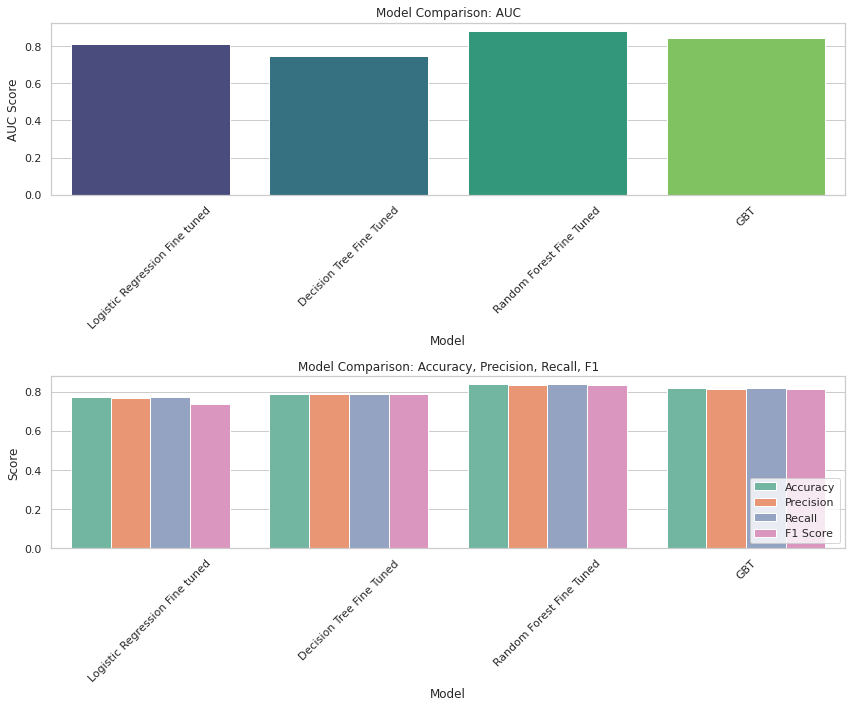

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))  # Taller height for stacked plots
 
# Plot AUC comparison (top chart)
plt.subplot(2, 1, 1)
sns.barplot(data=metrics_pd_df, x="Model", y="AUC", palette="viridis")
plt.title("Model Comparison: AUC")
plt.ylabel("AUC Score")
plt.xticks(rotation=45)
 
# Melt DataFrame for grouped bar chart (bottom chart)
metrics_melted = metrics_pd_df.melt(id_vars=["Model"],
                                    value_vars=["Accuracy", "Precision", "Recall", "F1 Score"],
                                    var_name="Metric", value_name="Score")
 
plt.subplot(2, 1, 2)
sns.barplot(data=metrics_melted, x="Model", y="Score", hue="Metric", palette="Set2")
plt.title("Model Comparison: Accuracy, Precision, Recall, F1")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
 
plt.tight_layout()
plt.show()

#### Conclusion

Based on the results, the Random Forest model emerges as the best performer overall, with the highest accuracy, precision, recall, and F1 score. It excels at capturing complex patterns and relationships in the data, making it the most reliable choice for predicting solar installation feasibility.

However, the GBT model should not be overlooked. While its accuracy is slightly lower than Random Forest, it achieves the good AUC, indicating that it is the discriminative model, excelling at distinguishing between feasible and non-feasible sites. This makes it a strong contender, especially for applications requiring precise class distinction.

The Decision Tree and Logistic Regression models perform well but fall behind the ensemble models in terms of accuracy and class distinction. These models are useful for initial analysis or when interpretability is crucial. However, they may not capture the same level of complexity that Random Forest and GBT are able to.

In conclusion, Random Forest is the best overall model for this task, offering a strong balance between accuracy and class distinction.

**Limitations**

During the process of model tuning, we encountered a limitation with the GBT model. Hyperparameter tuning for GBT took significantly longer compared to other models, which lead to timeouts and cluster terminations due to resource constraints.

As a result, we decided to define GBT model with chosen parameters  rather than performing extensive tuning, which may have impacted its overall performance compared to Random Forest model.

This issue highlights the trade-off between model complexity and computational resources. While GBT has shown strong performance, these computational limitations constrained our ability to fully optimize it.